In [1]:
import os, sys, math
sys.path.insert(0, '../../../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import pandas as pd

In [2]:
json_names = ['snrtest2.json', 'snrtest2_inv.json']
snr_list = [5, 7, 9, 11]
cwd = os.getcwd()

------------------------ snr_5_1_numspots_50_spot_img.png ------------------------


<Figure size 864x504 with 0 Axes>

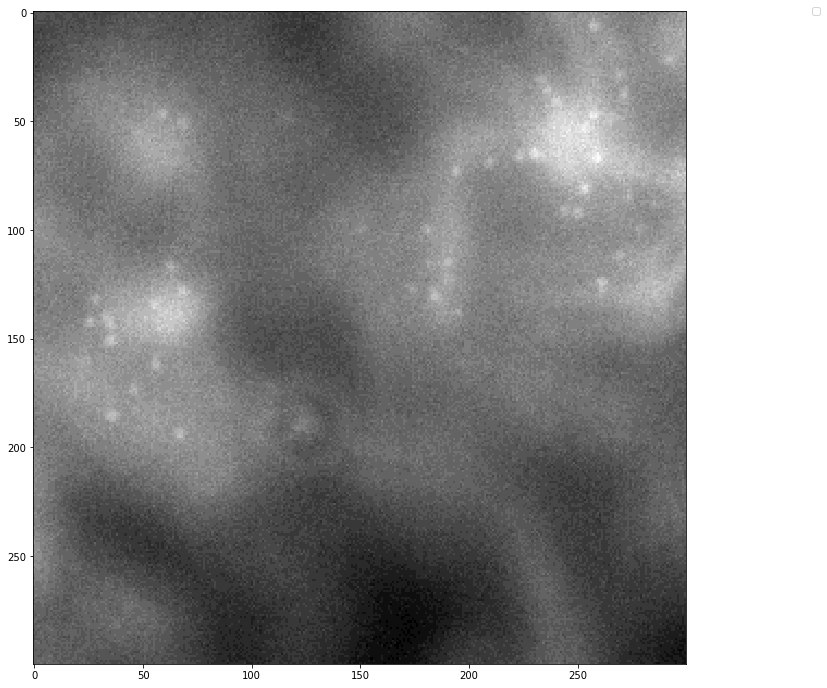

<Figure size 864x504 with 0 Axes>

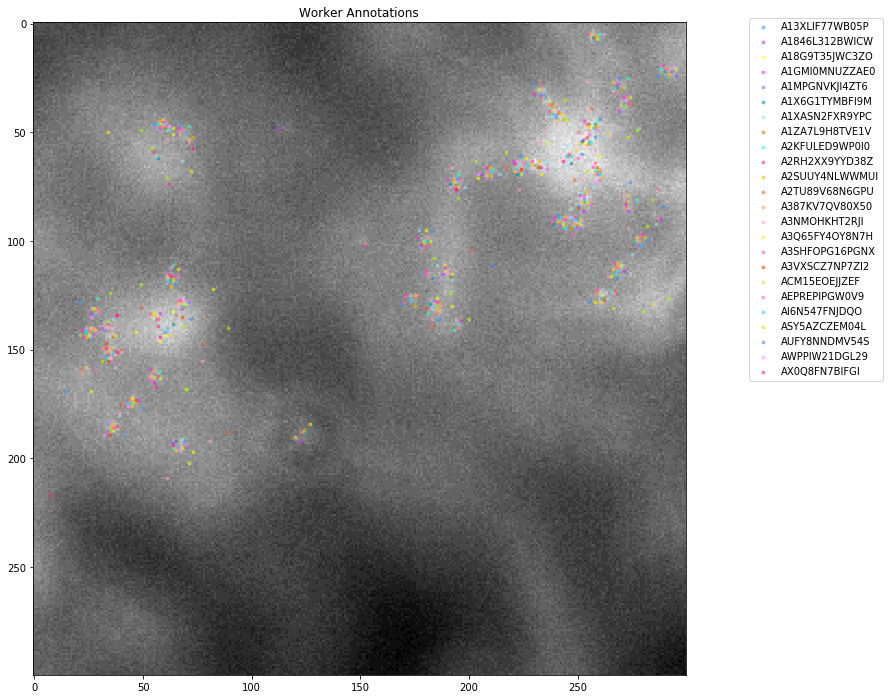

<Figure size 864x504 with 0 Axes>

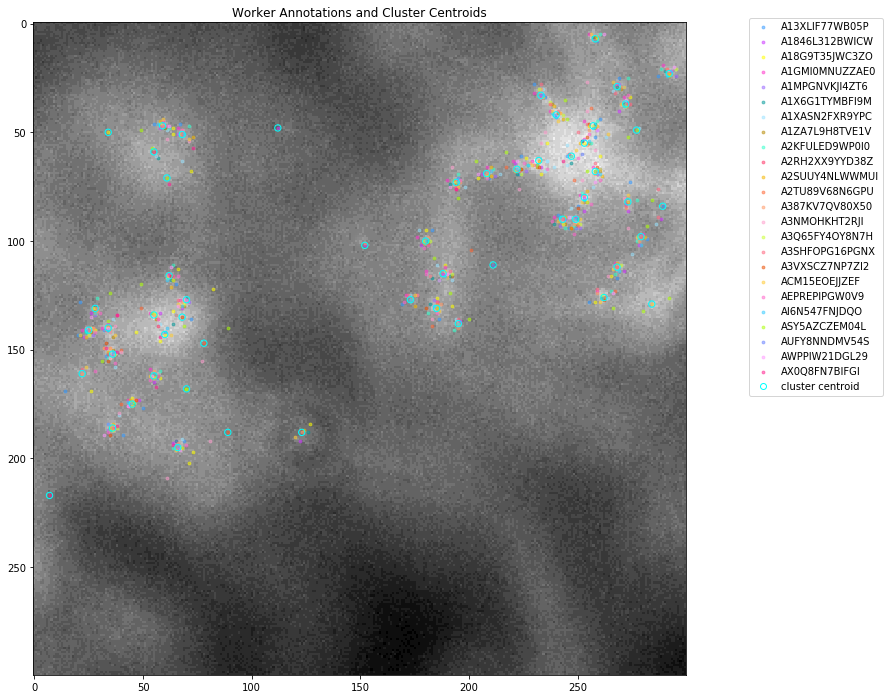

<Figure size 864x504 with 0 Axes>

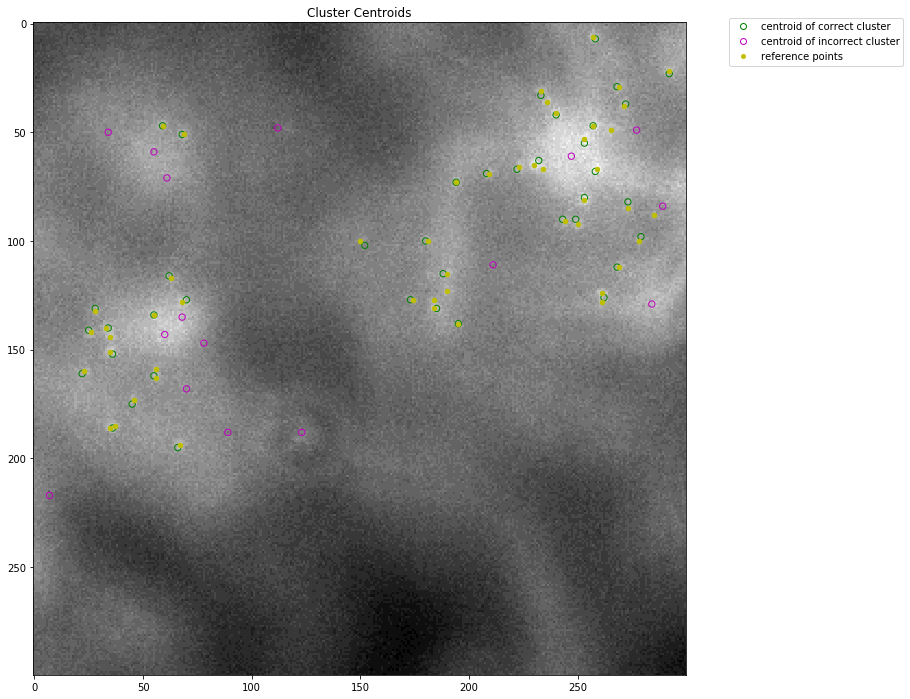

------------------------ snr_7_1_numspots_50_spot_img.png ------------------------


<Figure size 864x504 with 0 Axes>

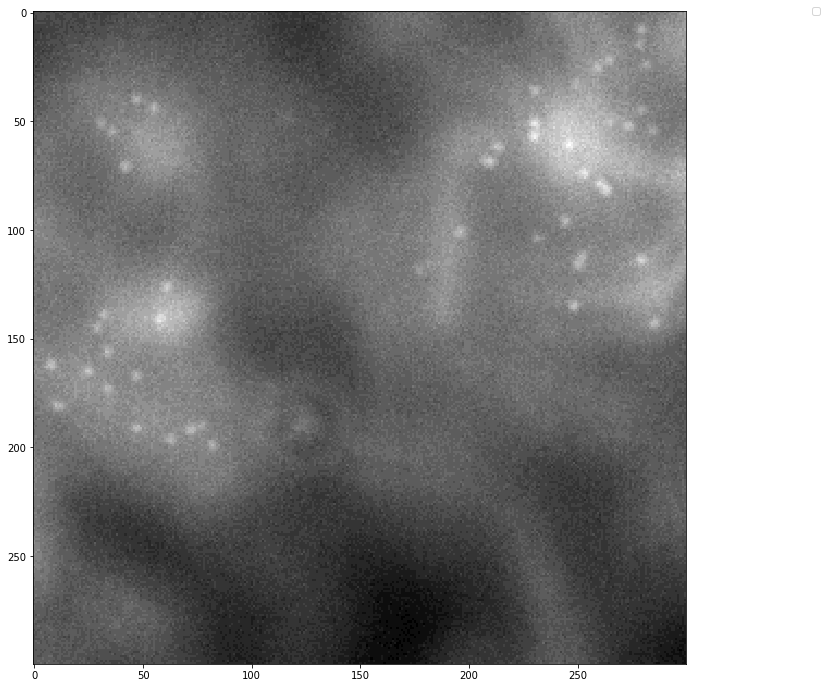

<Figure size 864x504 with 0 Axes>

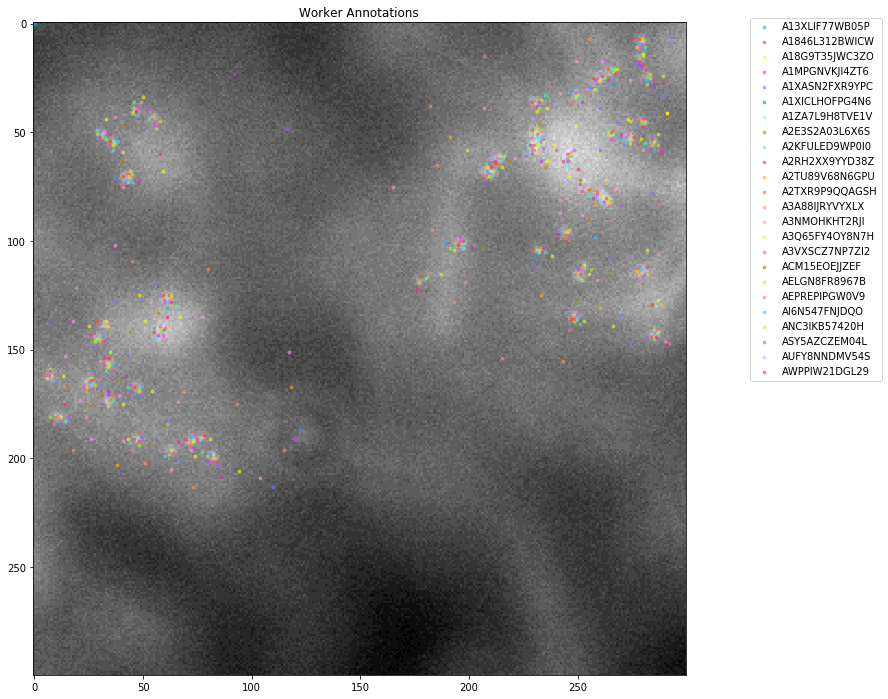

<Figure size 864x504 with 0 Axes>

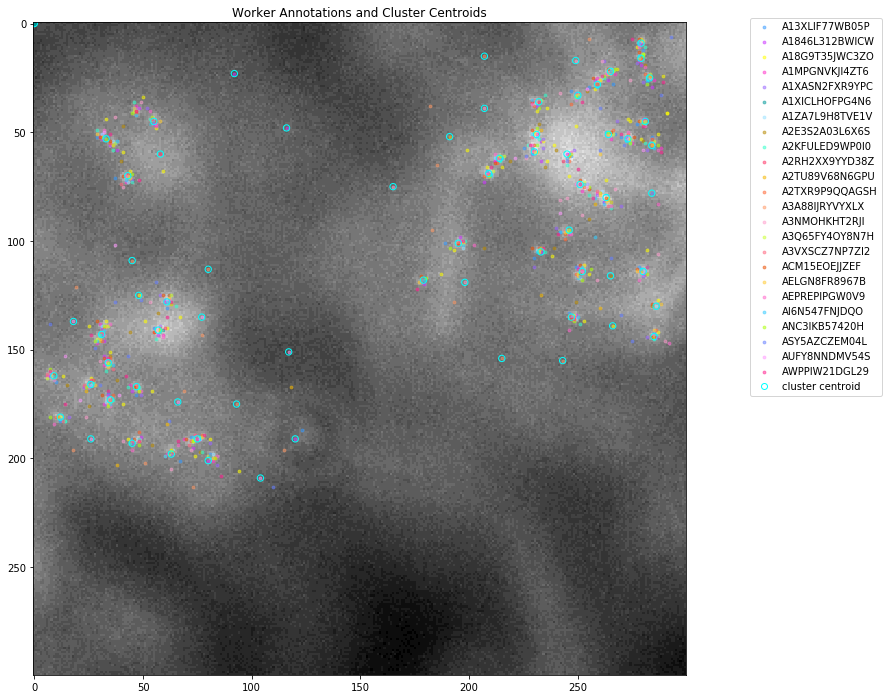

<Figure size 864x504 with 0 Axes>

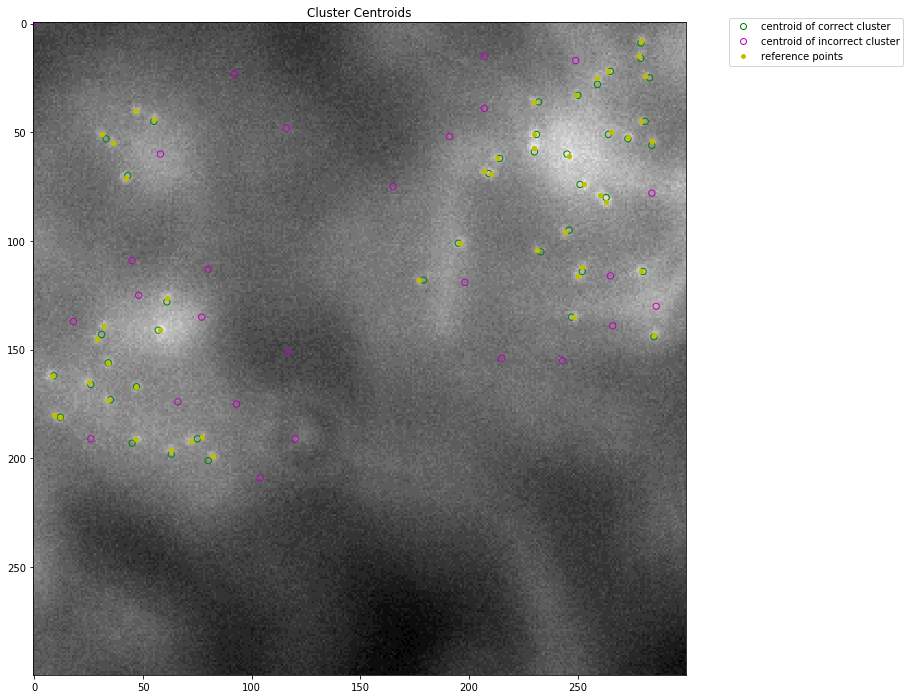

------------------------ snr_9_1_numspots_50_spot_img.png ------------------------


<Figure size 864x504 with 0 Axes>

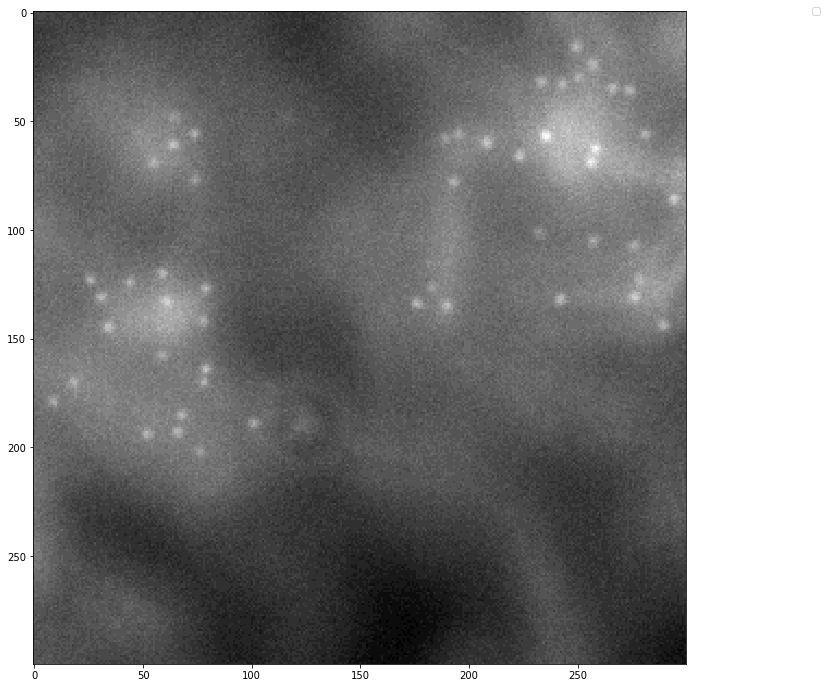

<Figure size 864x504 with 0 Axes>

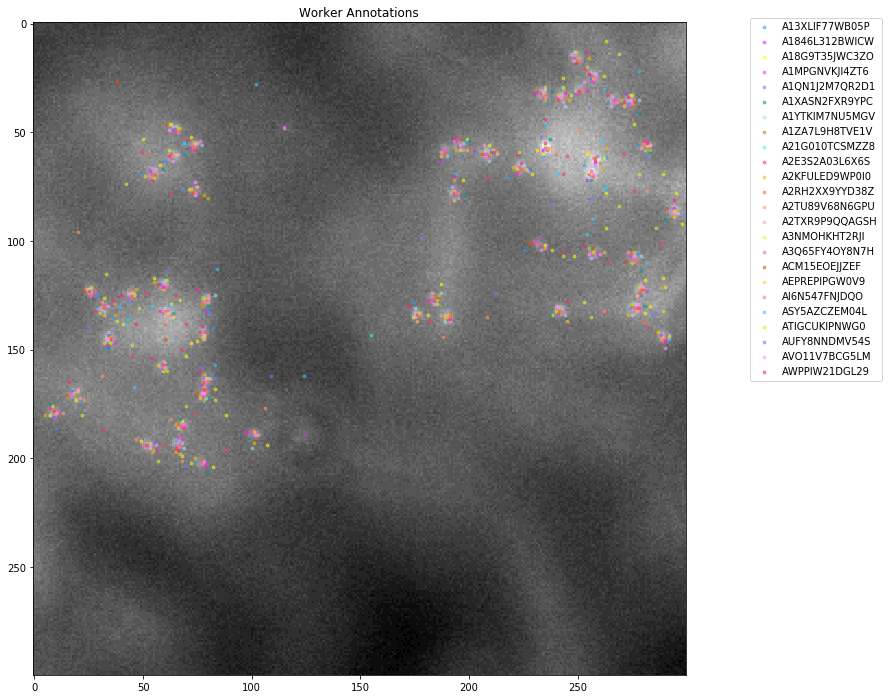

<Figure size 864x504 with 0 Axes>

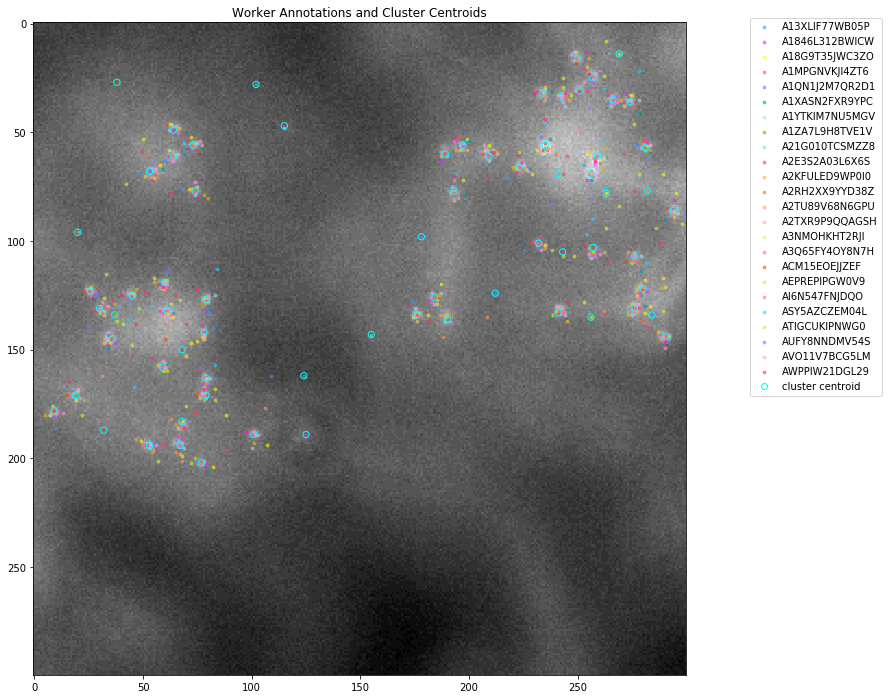

<Figure size 864x504 with 0 Axes>

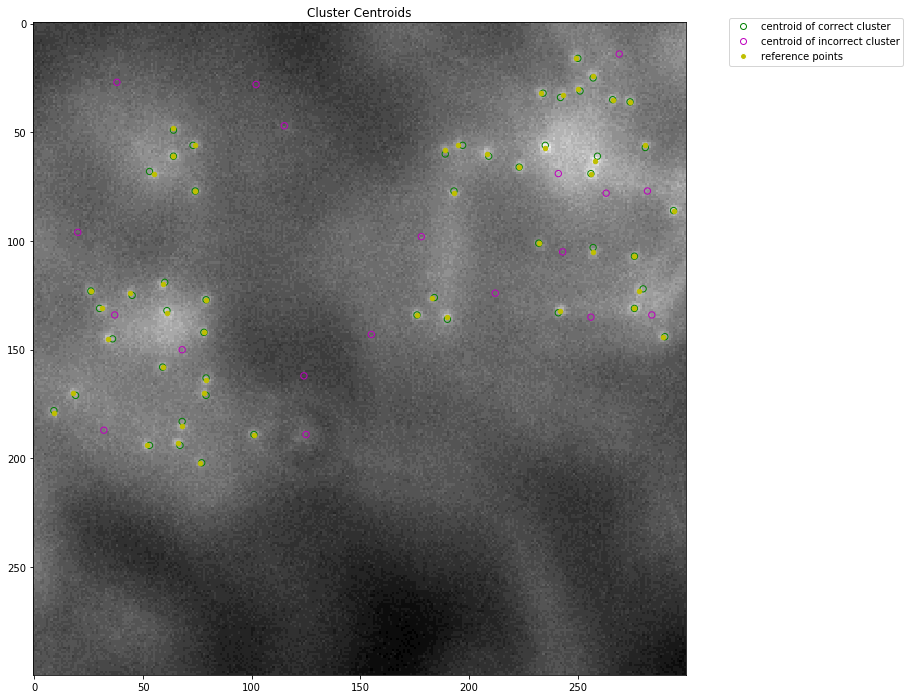

------------------------ snr_11_1_numspots_50_spot_img.png ------------------------


<Figure size 864x504 with 0 Axes>

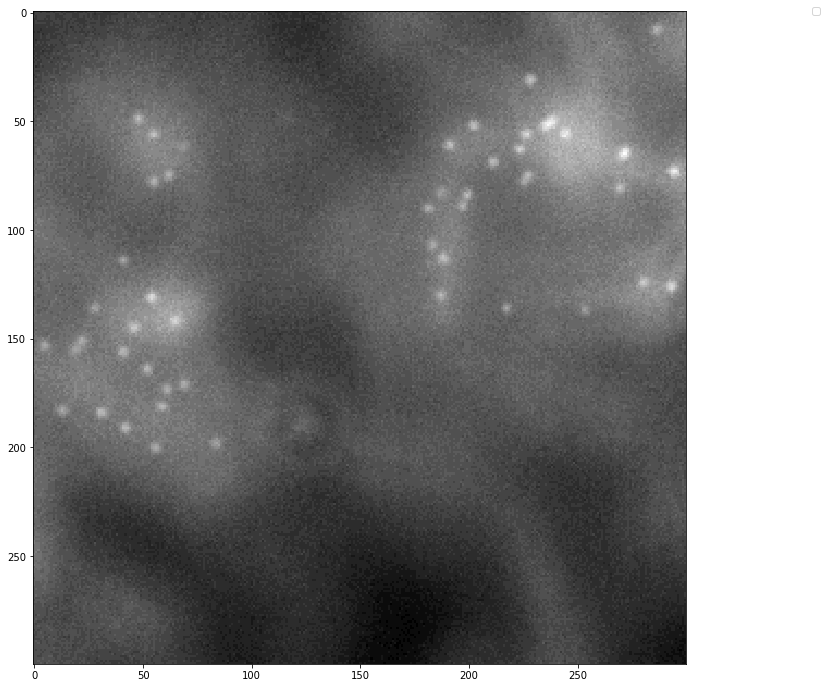

<Figure size 864x504 with 0 Axes>

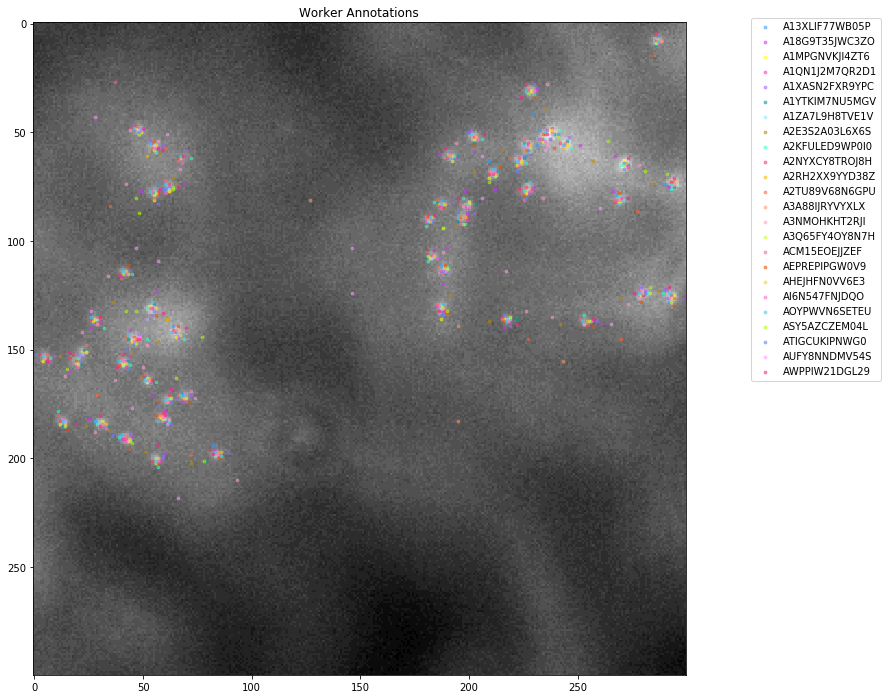

<Figure size 864x504 with 0 Axes>

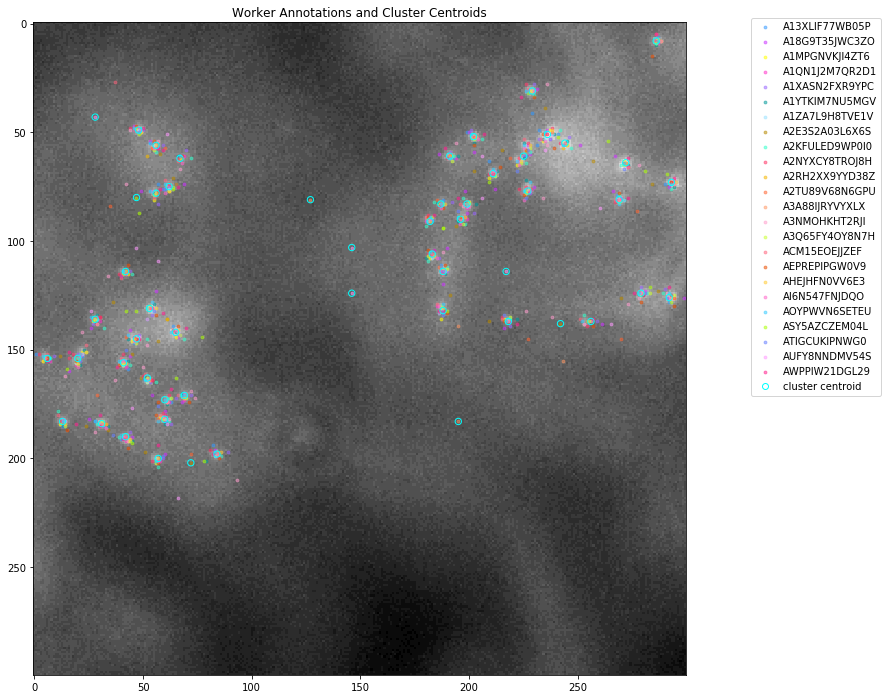

<Figure size 864x504 with 0 Axes>

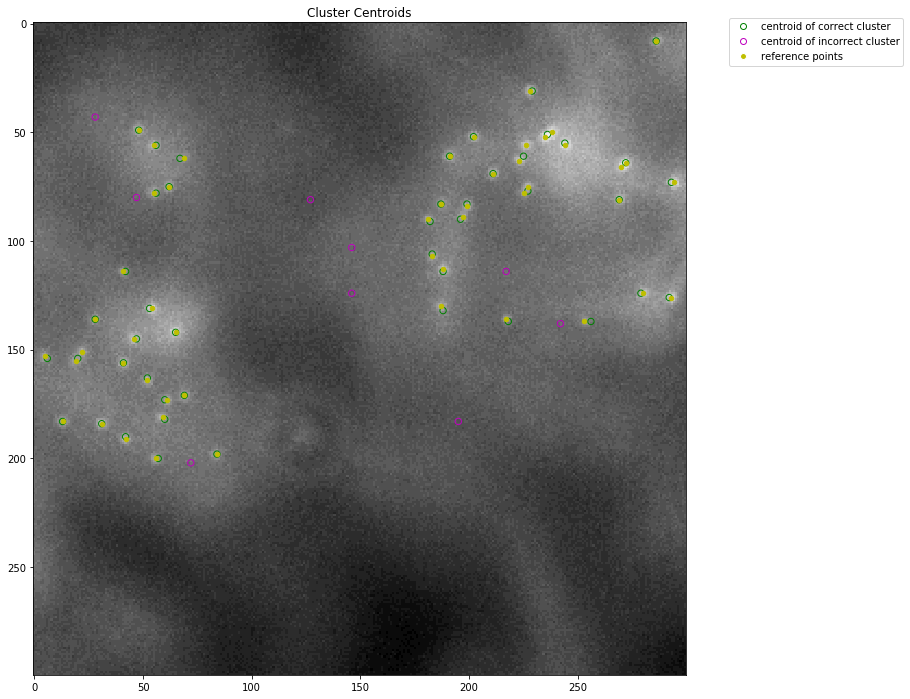

------------------------ snr_5_1_numspots_50_spot_img_inv.png ------------------------


<Figure size 864x504 with 0 Axes>

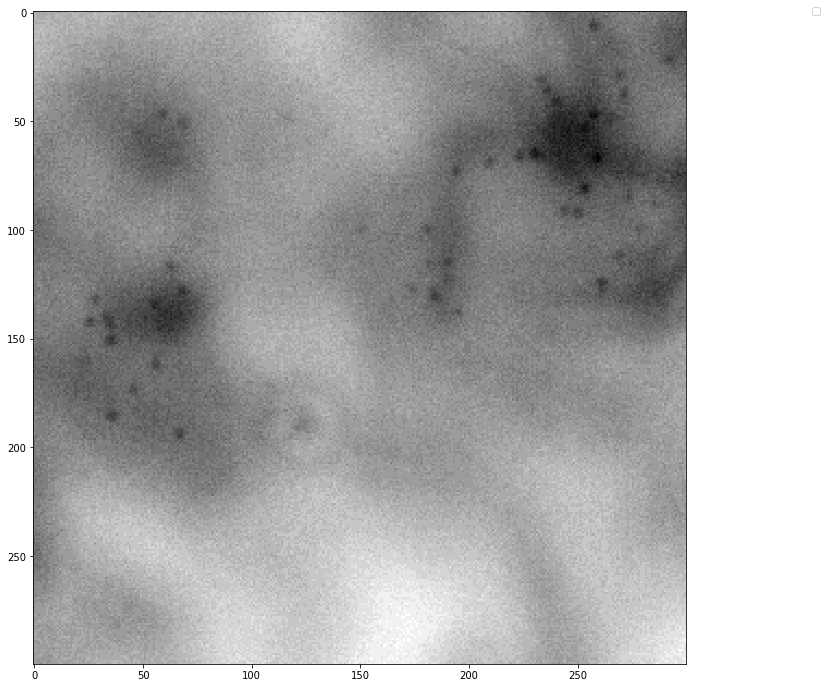

<Figure size 864x504 with 0 Axes>

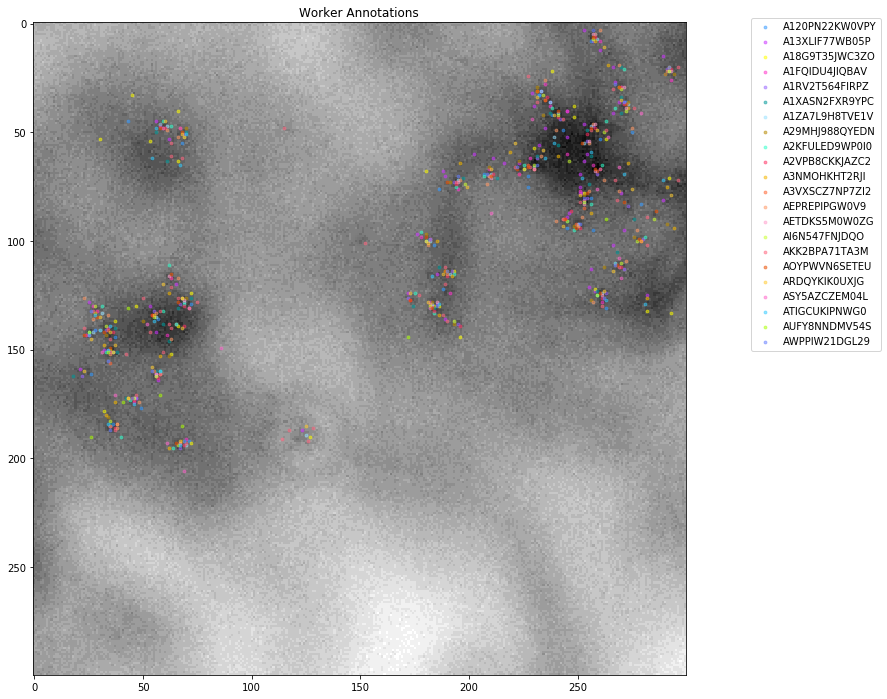

<Figure size 864x504 with 0 Axes>

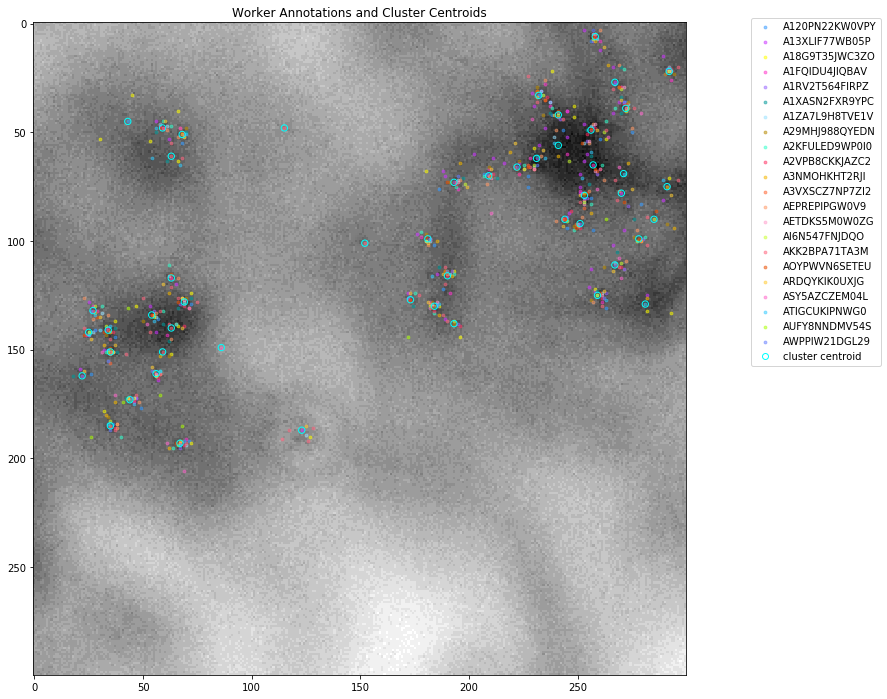

<Figure size 864x504 with 0 Axes>

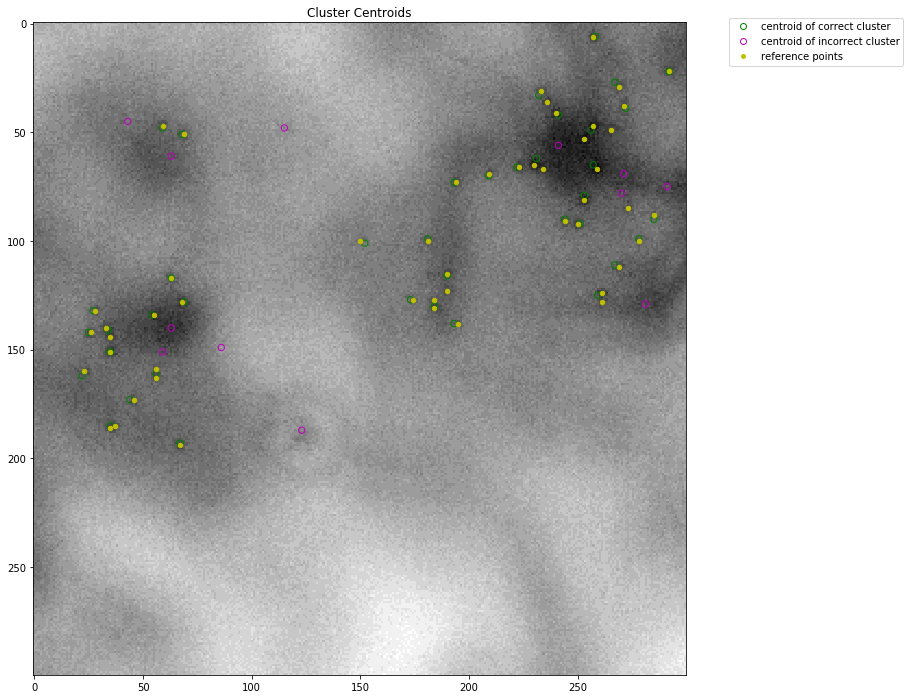

------------------------ snr_7_1_numspots_50_spot_img_inv.png ------------------------


<Figure size 864x504 with 0 Axes>

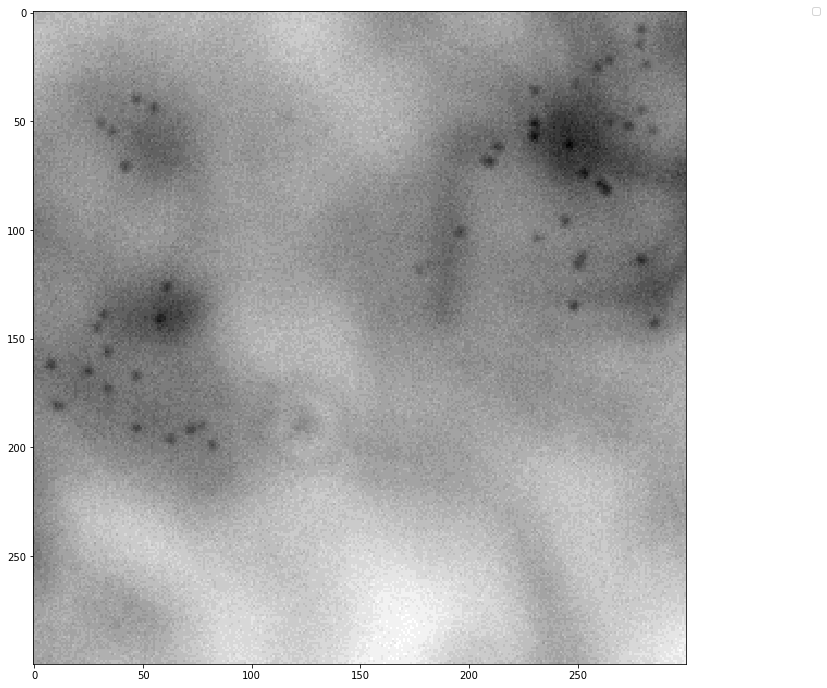

<Figure size 864x504 with 0 Axes>

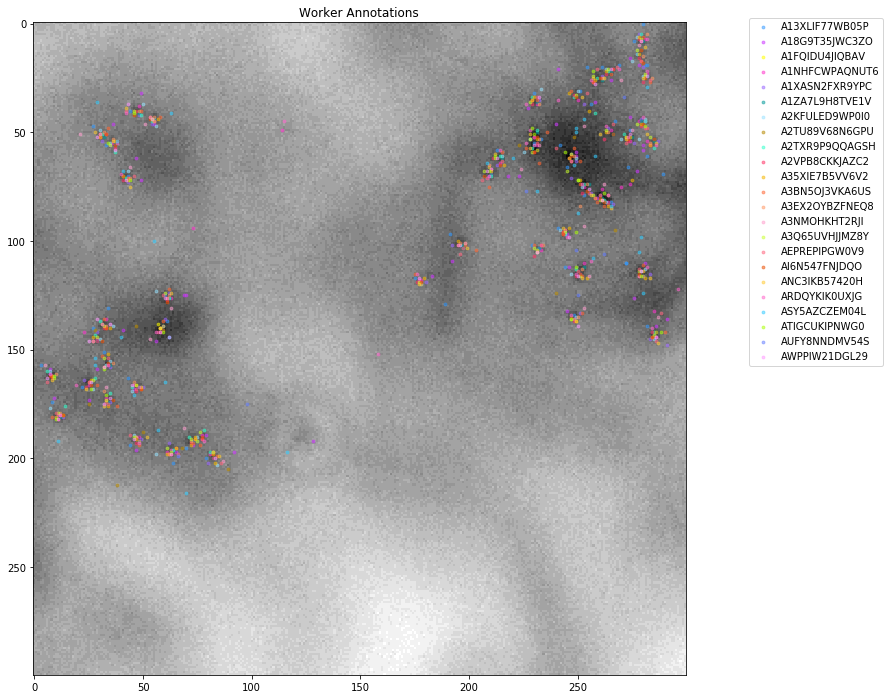

<Figure size 864x504 with 0 Axes>

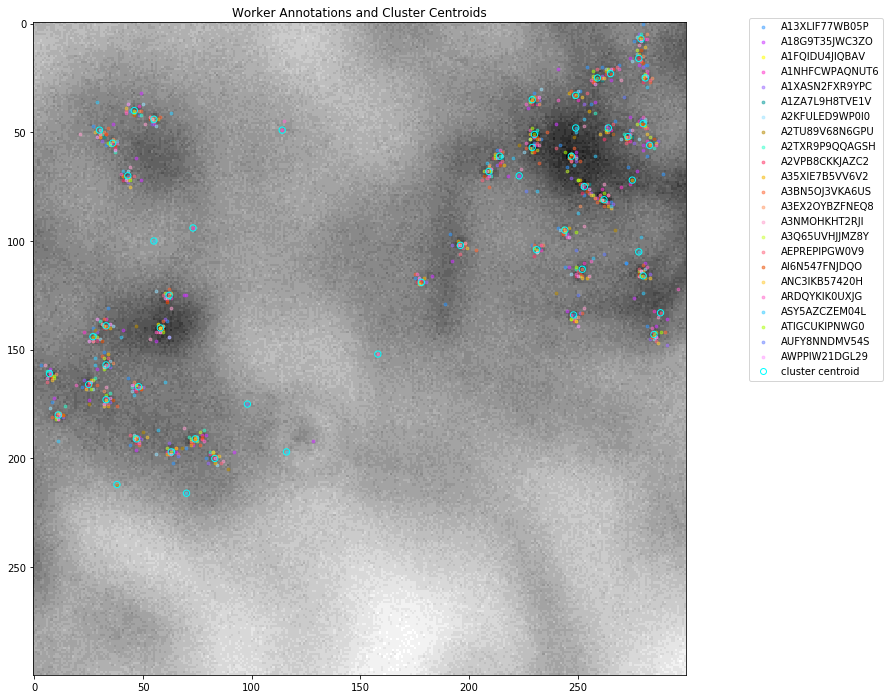

<Figure size 864x504 with 0 Axes>

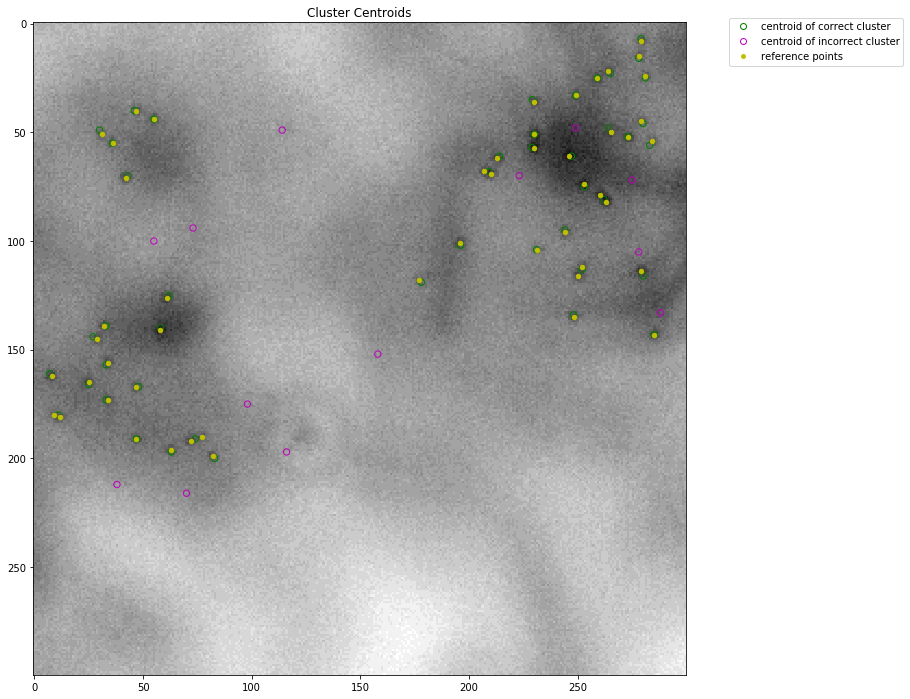

------------------------ snr_9_1_numspots_50_spot_img_inv.png ------------------------


<Figure size 864x504 with 0 Axes>

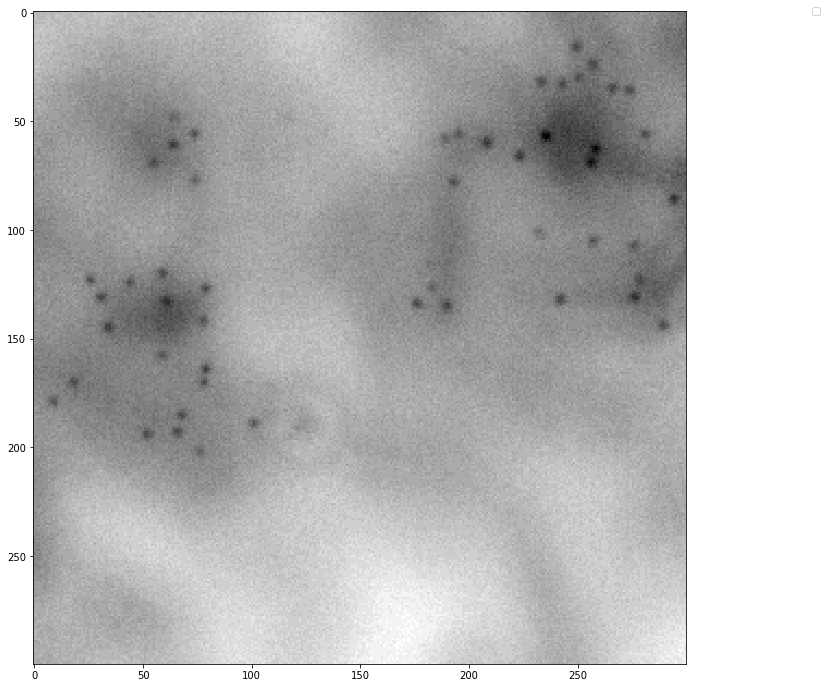

<Figure size 864x504 with 0 Axes>

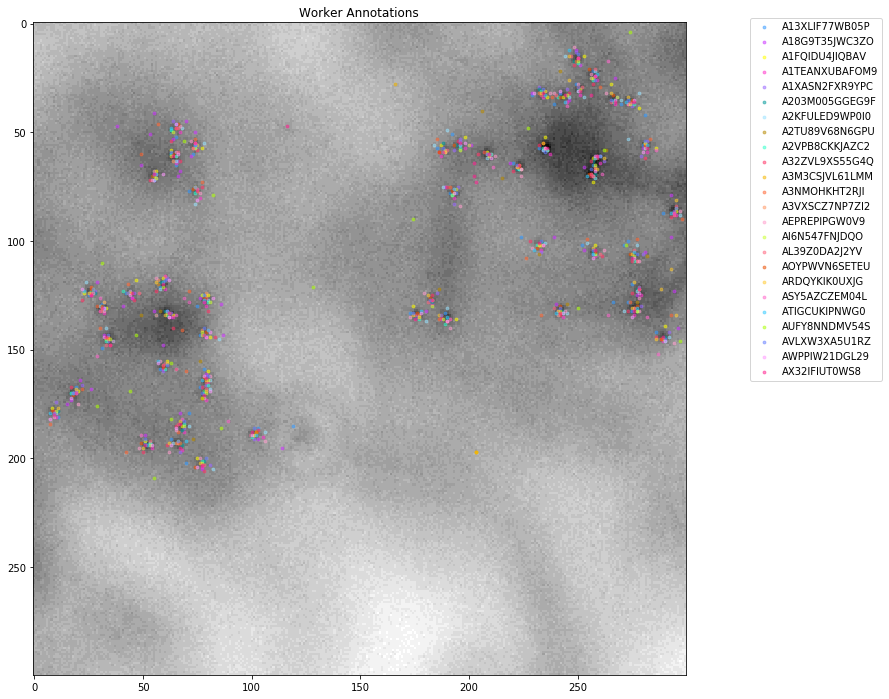

<Figure size 864x504 with 0 Axes>

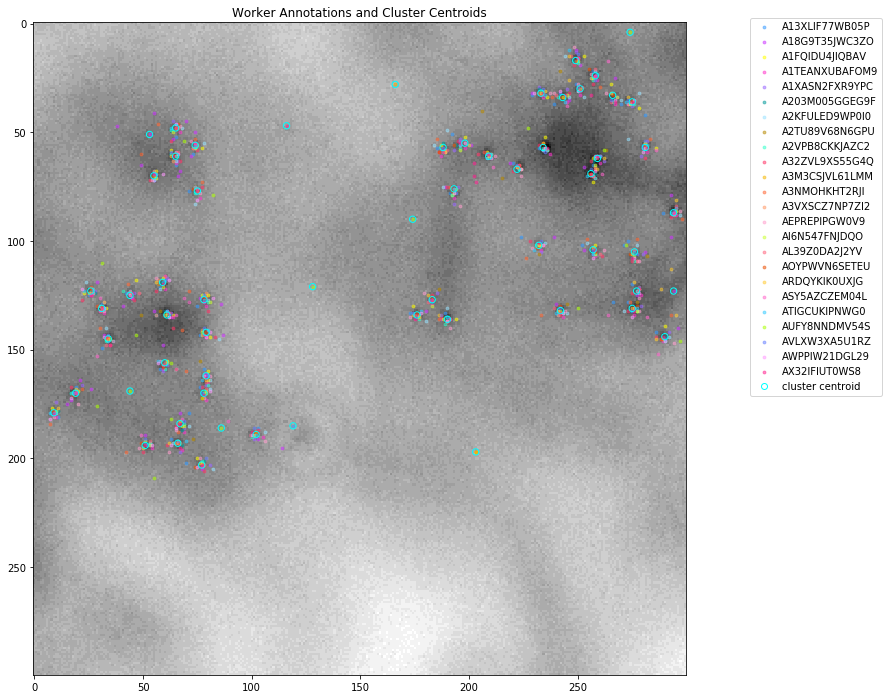

<Figure size 864x504 with 0 Axes>

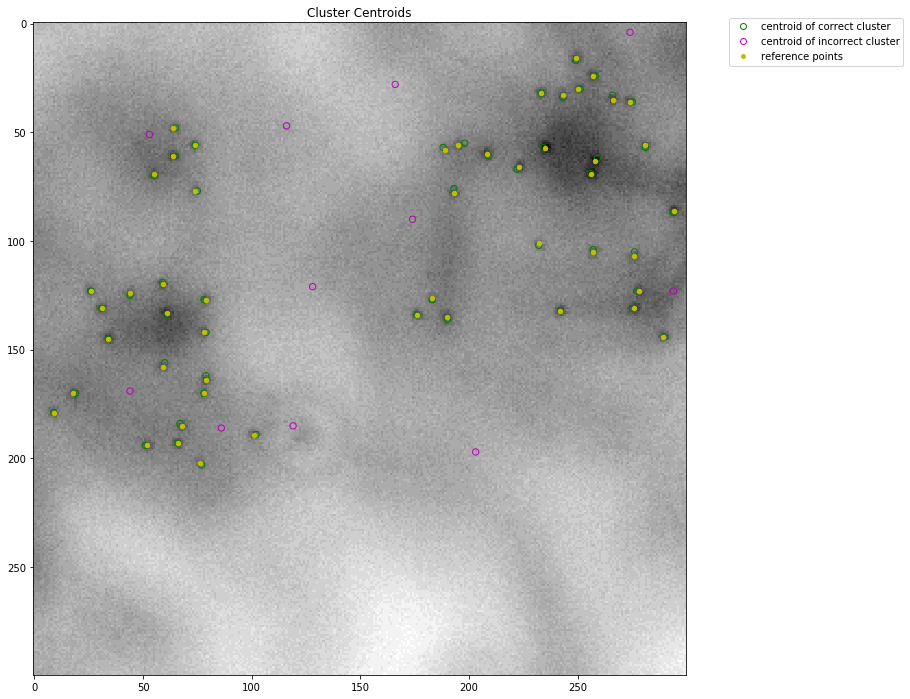

------------------------ snr_11_1_numspots_50_spot_img_inv.png ------------------------


<Figure size 864x504 with 0 Axes>

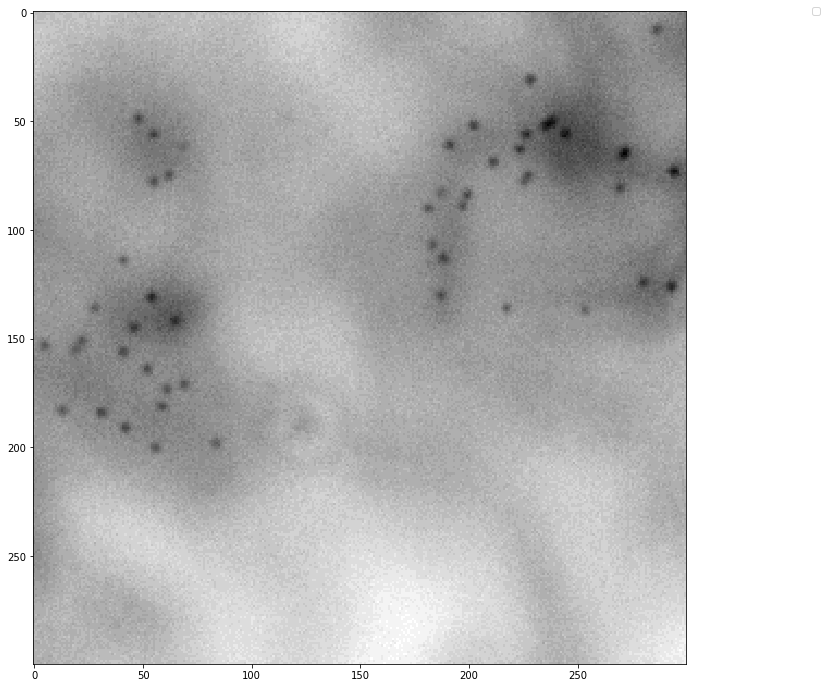

<Figure size 864x504 with 0 Axes>

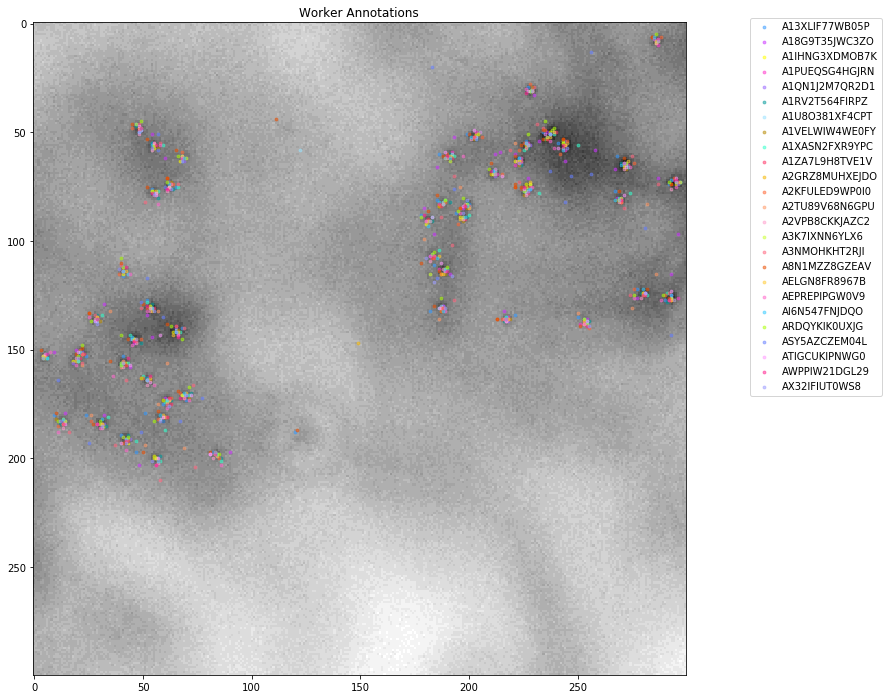

<Figure size 864x504 with 0 Axes>

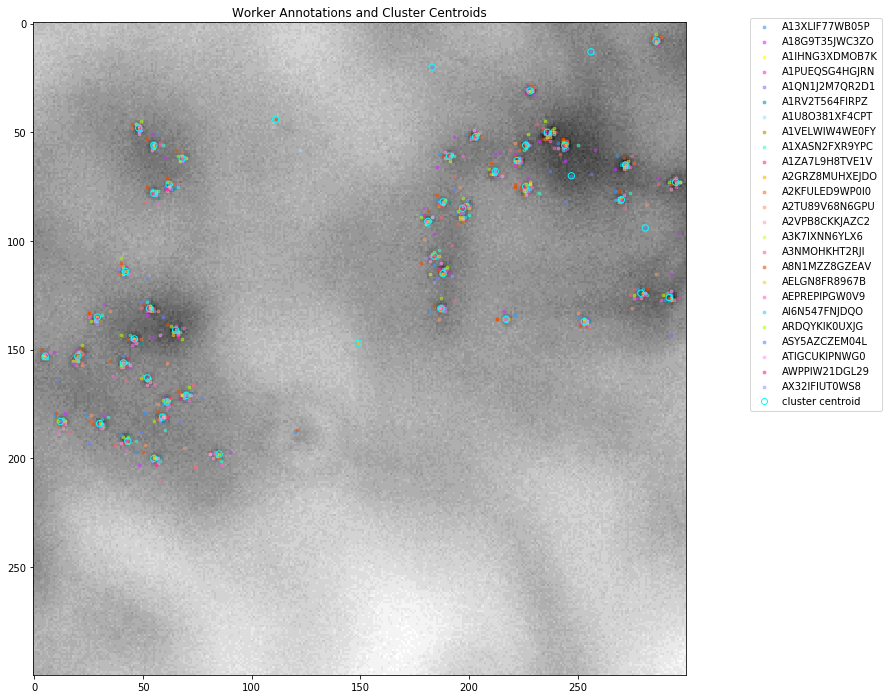

<Figure size 864x504 with 0 Axes>

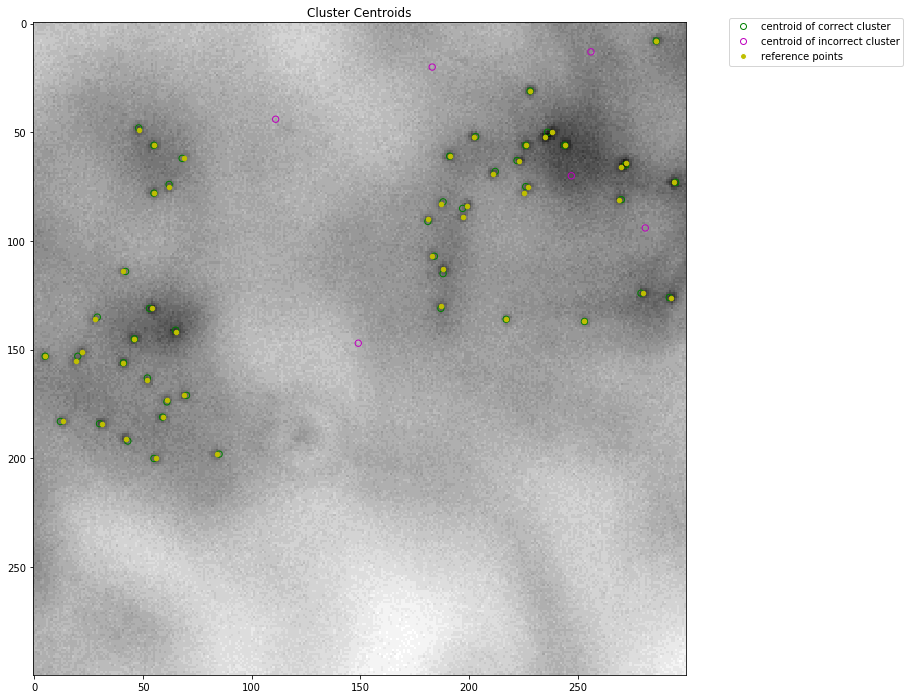

In [3]:
for json_name in json_names:
    x = '' if json_name == json_names[0] else '_inv'
    y = 'og' if json_name == json_names[0] else 'inv'
    
    for snr in snr_list:
        img_filename = 'snr_' + str(snr) + '_1_numspots_50_spot_img' + x + '.png'
        
        print('------------------------ ' + img_filename + ' ------------------------')
        img_filepath = cwd + '/spot_images/' + y + '/' + img_filename
        csv_filepath = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        qa = QuantiusAnnotation(json_name, img_filename)
        sa = SpotAnnotationAnalysis(qa)
        anno_all = qa.df()
        
        clustering_params = ['AffinityPropagation', -350]
        clusters = sa.get_clusters(anno_all, clustering_params)
        
        img_height = anno_all['height'].values[0]
        centroid_and_ref_df = util.centroid_and_ref_df(clusters, csv_filepath, img_height)

        show_workers = False
        show_correctness_workers = False
        show_centroids = False
        show_correctness_centroids = False
        show_ref_points = False
        show_NN_inc = False
        correctness_threshold = 4
        worker_marker_size = 8
        cluster_marker_size = 40
        ref_marker_size = None
        bigger_window_size = True
        
        """ Image Only """
        util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)
        
        """ Annotations Only """
        
        show_workers = True
        util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)
        
        """ Annotations and Centroids """
        
        show_centroids = True
        util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)
        
        """ Centroid Correctness """
        
        show_correctness_centroids = True
        show_ref_points = True
        show_workers = False
        util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)